In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Recreation of Figure 2.2

In [125]:
def bandit(num_episodes=1000, epsilon=0.1, k_arms=10):

    # setup new k-arm bandit problem
    Q_n = np.zeros(k_arms) # action value estimates
    Q_s = np.random.normal(loc=0.0, scale=1.0, size=(k_arms)) # true action values
    rewards = np.zeros(num_episodes)
    actions = np.zeros(num_episodes)
    actions_history = np.zeros(num_episodes)
    optimal_action = np.argmax(Q_s)
    action_count = np.zeros(k_arms)

    for t in range(1, num_episodes):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(10)  # Exploration
        else:
            action = np.argmax(Q_n)  # Exploitation

        # get a reward 
        reward = np.random.normal(loc=Q_s[action], scale=1)
        rewards[t] = reward

        # save the number of times we've picked this action for update to action-values using sample-average method
        action_count[action] += 1

        # update Q_n using sample-average method
        Q_n[action] += 1/action_count[action] * (reward - Q_n[action])

        # was action selected the optimal action?
        actions_history[t] = action
        actions[t] = action == optimal_action
                       
    return actions, rewards, Q_n, Q_s

In [126]:
def run_experiments(num_experiments, num_episodes, epsilon, k_arms):
    _rewards = np.zeros((num_experiments, num_episodes))
    _actions = np.zeros((num_experiments, num_episodes))
    
    for i in range(num_experiments):
        actions, rewards, Q_n, Q_s  = bandit(num_episodes, epsilon, k_arms)
        _rewards[i] = rewards
        _actions[i] = actions
        
    return _actions, _rewards, Q_n, Q_s

In [127]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [ ]:
num_experiments = 2000
num_episodes = 10000
k_arms = 10 

# Create subplots with 2 rows and 1 column, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)


for e in [0, 0.01, 0.1]:
# for e in [0.1]:
    print(e)

    # run k armed bandit experiments
    _actions, _rewards, Q_n, Q_s = run_experiments(num_experiments, num_episodes, e, k_arms)

    # Plot rewards on the first y-axis
    ax1.plot(
        list(range(num_episodes)),
        _rewards.mean(axis=0),
#         list(range(moving_average(_rewards.mean(axis=0), n=20).shape[0])),
#         moving_average(_rewards.mean(axis=0), n=20),
        alpha=0.5,
        label=f'epsilon = {e}',
        color='tab:blue'
    )
    ax1.set_ylabel('Average Reward')
    ax1.legend(loc='upper left')


    # Plot actions on the second y-axis
    ax2.plot(
        list(range(num_episodes)),
        _actions.mean(axis=0),
#             list(range(moving_average(_actions.mean(axis=0), n=20).shape[0])),
#             moving_average(_actions.mean(axis=0), n=20),
        alpha=0.5,
        label=f'epsilon = {e}',
        color='tab:orange'
    )
    ax2.set_ylabel('% Optimal Action')
    ax2.legend(loc='upper right')

# Set common x-axis label
ax2.set_xlabel('Episodes')
plt.tight_layout()
plt.show()

0
0.01
0.1


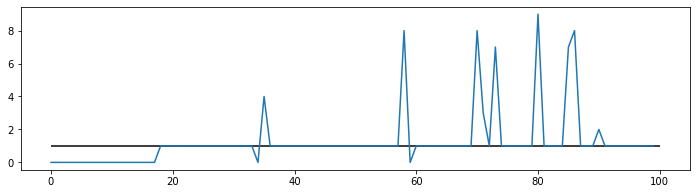

In [112]:
# plt.figure(figsize=(12, 3))
# plt.plot(actions_history)
# plt.hlines(y=optimal_action, xmin=0, xmax=num_episodes)

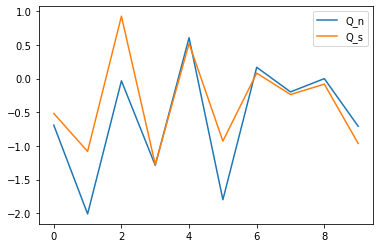

In [108]:
pd.DataFrame(data=[Q_n, Q_s], index=['Q_n','Q_s']).T.plot()

# Exercise 2.5

In [113]:
def bandit(num_episodes=1000, epsilon=0.1, k_arms=10, stationary=True, sample_average=True, alpha=0.1):

    # setup new k-arm bandit problem
    Q_n_init = np.zeros(k_arms) # action value estimates
    Q_n = Q_n_init.copy()
    Q_s = np.random.normal(loc=0.0, scale=1.0, size=(k_arms)) # true action values
    if stationary:
        optimal_action = np.argmax(Q_s)
    rewards = np.zeros(num_episodes)
    if not sample_average:
        reward_history = np.zeros((k_arms, num_episodes))
    actions = np.zeros(num_episodes)
    action_count = np.zeros(k_arms, dtype=int)


    for t in range(1, num_episodes):

        # move Q_s by np.random.normal(loc=0, scale=0.01**2)
        if not stationary:
            Q_s += np.random.normal(loc=0, scale=0.01**2, size=(k_arms))
            optimal_action = np.argmax(Q_s)

        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(10)  # Exploration
        else:
            action = np.argmax(Q_n)  # Exploitation

        # get a reward 
        reward = np.random.normal(loc=Q_s[action], scale=1.0)
        rewards[t] = reward

        # need to save reward history for each action if using incremental update rule
        if not sample_average:
            n = action_count[action]
            reward_history[action][n] = reward

        # save the number of times we've picked this action for update to action-values using sample-average method
        action_count[action] += 1

        # update Q_n
        if sample_average:
            # update Q_n using sample-average method
            Q_n[action] += 1/action_count[action] * (reward - Q_n[action])
        else: 
            # update Q_n using incremental update rule
            i_values = np.arange(1, n+1)
            R_i = reward_history[action][:n] 
            Q_n[action] = (1-alpha)**n*Q_n_init[action] + np.sum(alpha*(1-alpha)**(n-i_values)*R_i)

        # was action selected the optimal action?
        actions[t] = action == optimal_action

    return actions, rewards, Q_n, Q_s

actions, rewards, Q_n, Q_s = bandit(num_episodes=5000, epsilon=0.1, k_arms=10, stationary=False, sample_average=True, alpha=0.1)

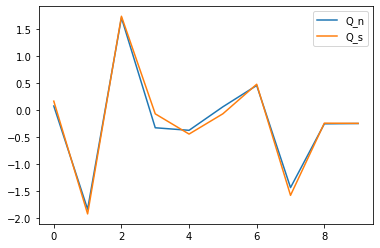

In [114]:

pd.DataFrame(data=[Q_n, Q_s], index=['Q_n','Q_s']).T.plot()

In [115]:
def run_experiments(num_experiments, num_episodes, epsilon, k_arms, stationary=True, sample_average=True, alpha=0.1):
    _rewards = np.zeros((num_experiments, num_episodes))
    _actions = np.zeros((num_experiments, num_episodes))
    
    for i in range(num_experiments):
        actions, rewards, Q_n, Q_s = bandit(num_episodes, epsilon, k_arms, stationary, sample_average, alpha)
        _rewards[i] = rewards
        _actions[i] = actions
        
    return _rewards, _actions

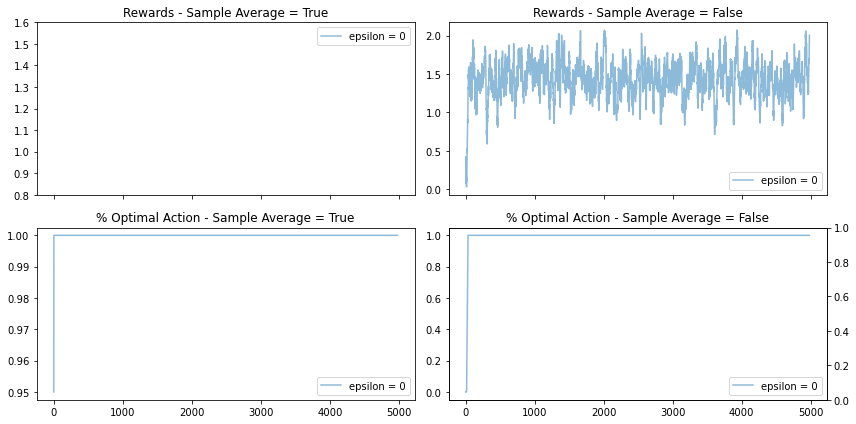

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the run_experiments and moving_average functions if they are not defined

num_experiments = 1
num_episodes = 5000
k_arms = 10
stationary = True
sample_average = False
alpha = 0.1

# Create a figure with subplots sharing the same x-axis
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)

plot_index_offset = 0
for sample_average in [True, False]:
    for e in [0, 0.01, 0.1]:

        print(sample_average, e)
        # Run k armed bandit experiments
        _rewards, _actions = run_experiments(num_experiments, num_episodes, e, k_arms, stationary, sample_average, alpha)

        # Plot results
        ax1 = axes[0, plot_index_offset]
        ax2 = axes[1, plot_index_offset]

        ax1.plot(
            list(range(moving_average(_rewards.mean(axis=0), n=20).shape[0])),
            moving_average(_rewards.mean(axis=0), n=20),
            alpha=0.5,
            label=f'epsilon = {e}'
        )
        ax1.set_title(f'Rewards - Sample Average = {sample_average}')
        ax1.legend()

        ax2.plot(
            list(range(moving_average(_actions.mean(axis=0), n=20).shape[0])),
            moving_average(_actions.mean(axis=0), n=20),
            alpha=0.5,
            label=f'epsilon = {e}'
        )
        ax2.set_title(f'% Optimal Action - Sample Average = {sample_average}')
        ax2.legend()

        # Set y-axis limits for the first row
        if plot_index_offset < 1:
            ax1.set_ylim([0.8, 1.6])

        # Create a twin Axes for the second row to have independent y-axis limits
        if plot_index_offset >= 1:
            ax2_twin = ax2.twinx()
            ax2_twin.set_ylim([0, 1])  # Set y-axis limits for the second row

    plot_index_offset += 1

plt.tight_layout()
plt.show()


True True 0
True True 0.01
True True 0.1
True False 0
True False 0.01
True False 0.1
False True 0
False True 0.01
False True 0.1
False False 0
False False 0.01
False False 0.1


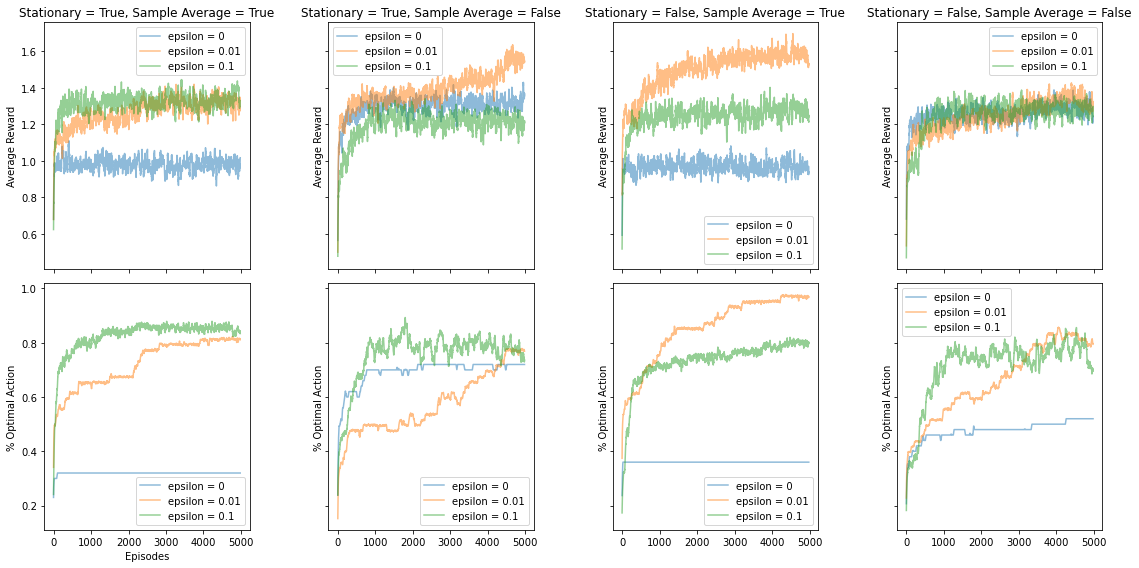

In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Define the run_experiments and moving_average functions if they are not defined

num_experiments = 50
num_episodes = 5000
k_arms = 10

# Values to iterate over
stationary_values = [True, False]
sample_average_values = [True, False]
epsilon_values = [0, 0.01, 0.1]

# Create a figure with subplots sharing the same x-axis
fig, axes = plt.subplots(2, 4, figsize=(16, 8), sharex=True, sharey='row')

# Counter to alternate between reward and optimal action plots
plot_index = 0

for stationary in stationary_values:
    for sample_average in sample_average_values:
        # Initialize lists to store data for rewards and optimal actions
        rewards_data = []
        optimal_actions_data = []

        for e in epsilon_values:
            print(stationary, sample_average, e)

            # Run k armed bandit experiments
            _rewards, _actions = run_experiments(num_experiments, num_episodes, e, k_arms, stationary, sample_average, alpha)

            # Store data for plotting
            rewards_data.append(_rewards.mean(axis=0))
            optimal_actions_data.append(_actions.mean(axis=0))

        # Select the appropriate subplot for rewards and optimal actions
        reward_ax = axes[0, plot_index]
        optimal_action_ax = axes[1, plot_index]

        # Plot rewards
        for i, e in enumerate(epsilon_values):
            reward_ax.plot(
                list(range(moving_average(rewards_data[i], n=20).shape[0])),
                moving_average(rewards_data[i], n=20),
                alpha=0.5,
                label=f'epsilon = {e}'
            )
        reward_ax.set_title(f'Stationary = {stationary}, Sample Average = {sample_average}')
        reward_ax.set_ylabel('Average Reward')
        reward_ax.legend()

        # Plot optimal actions
        for i, e in enumerate(epsilon_values):
            optimal_action_ax.plot(
                list(range(moving_average(optimal_actions_data[i], n=20).shape[0])),
                moving_average(optimal_actions_data[i], n=20),
                alpha=0.5,
                label=f'epsilon = {e}'
            )
        optimal_action_ax.set_ylabel('% Optimal Action')
        optimal_action_ax.legend()

        # Increment the plot index to switch to the next subplot
        plot_index += 1

# Set common x-axis label
axes[1, 0].set_xlabel('Episodes')

plt.tight_layout()
plt.show()
